<img src="img/header.png"></img>

<h2> Tweepy untuk Data Crawler -> Cleaning (Tokenisasi, CaseFolding, Remove Karakter) </h2>

In [1]:
#!pip install tweepy

In [2]:
import tweepy
import pandas as pd

In [3]:
consumer_key = "JEj5tRSA9JWjWV6imMOrUIVWV"        
consumer_secret = "7MEa00KHpUbjxble8pdlV74qPbvW2OHqLtjt45QQraJaAzRmAh"
access_token = "935208713551364097-W9Oy0IS2M1dRUQS5MZ6Dnz18BkHUP80"
access_secret = "jCANa7K7werTP2X1mnLlcRBFDHAJt9TZSCbC77FSNCj50"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [4]:
api = tweepy.API(auth) # # Construct the API instance
#api.update_status('tweepy + oauth!') # coba update status otomatis :D

In [5]:
user = api.get_user(935208713551364097)    
print(user.screen_name)

user = api.get_user(screen_name = 'BigDataFreeCode')
print(user.id)

BigDataFreeCode
935208713551364097


In [6]:
tweets = api.search(q="#detikcom", lang="id", count=10, tweet_mode="extended")

In [7]:
all_tweets = []
for tweet in tweets:
    #print("--------------------")
    #print(tweet.full_text)
    #print("--------------------\n")
    all_tweets.append({"text": tweet.full_text})
tweets_df = pd.DataFrame(all_tweets)

In [8]:
print(tweets_df.values)

[['Yah ga jdi melucu lagi deh...\n◇\n◇\n#Artist #nunung #artiskomedy #kriminal #Trending #narkotika #narkoa #komedian #detikcom 📷Repost: @detikcom https://t.co/RQdWPgWR0f']
 ['Kaca film Spectrum Black dpn 60% skkb 80% WA: 0852 4414 5209 #detiknews #detikoto #detikcom #beritasatu #beritajatim #kompasiana #kompascom #kompasotomotif #like4likes #likeforlikes #avanzaxenia_indonesiaclub #likes… https://t.co/DoqZtyQlnr']
 ['RT @DwikoKusuma: @detikcom @detikhot Apa ya alasan @detikcom mempublikasikan artikel macam ini tanpa pikir panjang ? #detikcom #DennyCagur…']
 ['@detikcom @detikhot Apa ya alasan @detikcom mempublikasikan artikel macam ini tanpa pikir panjang ? #detikcom #DennyCagur #RaffiAhmad']
 ["teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG"]


In [9]:
# export df to json
tweets_df.to_json('Data Crawling Tweet 10-2.json')

In [10]:
# coba print json tersebut
pd.options.display.max_colwidth = 500 # sesuaikan dgn maksimal karakter di tweet
tweets_json_df = pd.read_json('Data Crawling Tweet 10.json')
#print(tweets_json)
print(tweets_json_df[:5])

                                                                                                                                                                                                                                                                                                                 text
0                 teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG
1                                                                                                                     Keren...cakep...salut...merinding...kamu gmn bro? (admin)\n.\n#RYLAcademy #RYLifeCoach #RYLMotivasi #RYLWorkshop #detikdotcom #detikcom #indonesia #satuindonesia #nkri https://t.co/lrEkf753ui
2                                        #WAJIBTAHU #MMP #MALANGMARKET

In [11]:
# join all text
print(len(tweets_json_df))
type(tweets_json_df)

6


pandas.core.frame.DataFrame

In [12]:
print(tweets_json_df.loc[0].values)

["teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG"]


In [13]:
tweets_json_df['count'] = tweets_json_df['text'].str.split().str.len()

print(tweets_json_df)

                                                                                                                                                                                                                                                                                                                 text  \
0                 teruskan merajut merah putih, teruskan bangsa ini bersatu, jangan sampai pecah. Tapi soal kekuasaan, berikan kesempatan yang utuh pada Pak Jokowi-Ma'ruf Amin dengan nanti 5 tahun. Kita awasi dan itulah produk indah demokrasi.\n#detikcom #detikdotcom #TahuDaridetikcom https://t.co/ErMtOM56gG   
1                                                                                                                     Keren...cakep...salut...merinding...kamu gmn bro? (admin)\n.\n#RYLAcademy #RYLifeCoach #RYLMotivasi #RYLWorkshop #detikdotcom #detikcom #indonesia #satuindonesia #nkri https://t.co/lrEkf753ui   
2                                        #WAJIBTAHU #MMP #MAL

In [14]:
#update status
#api.update_status('a a b c d d e') # coba update status otomatis :D
#api.update_status('a b b d')

#api.update_status('#CloudComputing Filkom UB Digital Talent 2019'); # menambah tanda ";" untuk hide output


In [15]:
all_tweets2 = []
# search timeline status id_or_name
id_or_name = '935208713551364097'
#id_or_name = 'BigDataFreeCode'
for status in tweepy.Cursor(api.user_timeline, id=id_or_name, tweet_mode='extended').items():
    print(status.full_text) 
    
    #all_tweets2.append({"text": status.full_text})
    all_tweets2.append(status.full_text)
    #status = status._json
    print(status)
tweets_df2 = pd.DataFrame(all_tweets2)

tweepy + oauth!
Status(_api=<tweepy.api.API object at 0x00000201EA2C16A0>, _json={'created_at': 'Sun Jul 21 05:54:20 +0000 2019', 'id': 1152819074528927744, 'id_str': '1152819074528927744', 'full_text': 'tweepy + oauth!', 'truncated': False, 'display_text_range': [0, 15], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://bigdatafreecode.wordpress.com/" rel="nofollow">PyTwitter-Stream-Mining</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 935208713551364097, 'id_str': '935208713551364097', 'name': 'Big Data Free Code', 'screen_name': 'BigDataFreeCode', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 1, 'friends_count': 49, 'listed_count': 0, 'created_at': 'Mon Nov 27 18:08:27 +0000 2017', 'favourites_count': 0, 'utc_off

In [16]:
print(tweets_df2)

                                               0
0                                tweepy + oauth!
1  #CloudComputing Filkom UB Digital Talent 2019
2           #BigDataFilkomUB Digital Talent 2019
3                                 tweepy + auth!
4                                tweepy + oauth!
5        Hi, Aku Cinta Indonesia #jokowi @jokowi
6                                        a c b d
7                                        a b b d
8                tweepy + data sicence indonesia
9                                tweepy + oauth!


In [17]:
# hitung banyak kata tiap tweet
tweets_df2['count'] = tweets_df2[0].str.split().str.len()
print(tweets_df2)

                                               0  count
0                                tweepy + oauth!      3
1  #CloudComputing Filkom UB Digital Talent 2019      6
2           #BigDataFilkomUB Digital Talent 2019      4
3                                 tweepy + auth!      3
4                                tweepy + oauth!      3
5        Hi, Aku Cinta Indonesia #jokowi @jokowi      6
6                                        a c b d      4
7                                        a b b d      4
8                tweepy + data sicence indonesia      5
9                                tweepy + oauth!      3


In [18]:
type(all_tweets2)

list

In [19]:
print(all_tweets2)

['tweepy + oauth!', '#CloudComputing Filkom UB Digital Talent 2019', '#BigDataFilkomUB Digital Talent 2019', 'tweepy + auth!', 'tweepy + oauth!', 'Hi, Aku Cinta Indonesia #jokowi @jokowi', 'a c b d', 'a b b d', 'tweepy + data sicence indonesia', 'tweepy + oauth!']


In [20]:
# split kata_n_other by space
split_kata_n_other = []
for item in all_tweets2:
    split_kata_n_other.extend(item.lower().split()) # gunakan lowe() untuk lowercase
    
print(split_kata_n_other)

print()

#hitung split_kata_n_other unik dan frekuensinya dengan dictionary
frek_kata_n_other_dict = {} 
  
for keys in split_kata_n_other: 
    frek_kata_n_other_dict[keys] = frek_kata_n_other_dict.get(keys, 0) + 1

print(frek_kata_n_other_dict)

print()

print(frek_kata_n_other_dict['tweepy'])

print()
values = []
keys = []
for key in frek_kata_n_other_dict.keys():
    keys.append(key)
    values.append(frek_kata_n_other_dict[key])
                
print(keys)
print(values)

['tweepy', '+', 'oauth!', '#cloudcomputing', 'filkom', 'ub', 'digital', 'talent', '2019', '#bigdatafilkomub', 'digital', 'talent', '2019', 'tweepy', '+', 'auth!', 'tweepy', '+', 'oauth!', 'hi,', 'aku', 'cinta', 'indonesia', '#jokowi', '@jokowi', 'a', 'c', 'b', 'd', 'a', 'b', 'b', 'd', 'tweepy', '+', 'data', 'sicence', 'indonesia', 'tweepy', '+', 'oauth!']

{'tweepy': 5, '+': 5, 'oauth!': 3, '#cloudcomputing': 1, 'filkom': 1, 'ub': 1, 'digital': 2, 'talent': 2, '2019': 2, '#bigdatafilkomub': 1, 'auth!': 1, 'hi,': 1, 'aku': 1, 'cinta': 1, 'indonesia': 2, '#jokowi': 1, '@jokowi': 1, 'a': 2, 'c': 1, 'b': 3, 'd': 2, 'data': 1, 'sicence': 1}

5

['tweepy', '+', 'oauth!', '#cloudcomputing', 'filkom', 'ub', 'digital', 'talent', '2019', '#bigdatafilkomub', 'auth!', 'hi,', 'aku', 'cinta', 'indonesia', '#jokowi', '@jokowi', 'a', 'c', 'b', 'd', 'data', 'sicence']
[5, 5, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1]


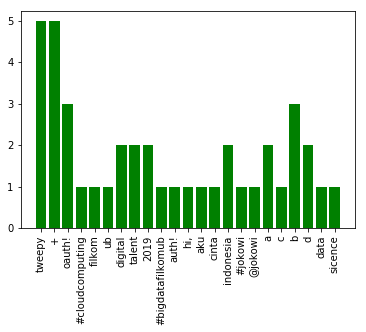

In [21]:
#plot frek_kata_n_other_dict
import matplotlib.pyplot as plt
plt.bar(list(frek_kata_n_other_dict.keys()), frek_kata_n_other_dict.values(), color='g')

plt.tick_params(axis='x', rotation=90)

plt.show()
plt.close()

In [22]:
type(split_kata_n_other)

list

In [23]:
print(split_kata_n_other)

['tweepy', '+', 'oauth!', '#cloudcomputing', 'filkom', 'ub', 'digital', 'talent', '2019', '#bigdatafilkomub', 'digital', 'talent', '2019', 'tweepy', '+', 'auth!', 'tweepy', '+', 'oauth!', 'hi,', 'aku', 'cinta', 'indonesia', '#jokowi', '@jokowi', 'a', 'c', 'b', 'd', 'a', 'b', 'b', 'd', 'tweepy', '+', 'data', 'sicence', 'indonesia', 'tweepy', '+', 'oauth!']


In [24]:
# cleaning
import re # menggunakan regular expression
for i in range(len(split_kata_n_other)):
    split_kata_n_other[i] = re.sub(r'(\A|\s)@(\w+)| (^https?:\/\/.*[\r\n]*) | (\A|\s)[0-9](\w+) | (\d)',"", split_kata_n_other[i])
    split_kata_n_other[i] = re.sub(r'\d',"",split_kata_n_other[i])
    split_kata_n_other[i] = re.sub(r'[-+.?%&^*!()/,`~;:< >#]', "", split_kata_n_other[i])
split_kata_n_other=' '.join(split_kata_n_other).split() # remove empty string pada list

In [25]:
print(split_kata_n_other)

['tweepy', 'oauth', 'cloudcomputing', 'filkom', 'ub', 'digital', 'talent', 'bigdatafilkomub', 'digital', 'talent', 'tweepy', 'auth', 'tweepy', 'oauth', 'hi', 'aku', 'cinta', 'indonesia', 'jokowi', 'a', 'c', 'b', 'd', 'a', 'b', 'b', 'd', 'tweepy', 'data', 'sicence', 'indonesia', 'tweepy', 'oauth']


In [26]:
#hitung split_kata_n_other unik dan frekuensinya dengan dictionary
frek_kata_n_other_dict = {} 
  
for keys in split_kata_n_other: 
    frek_kata_n_other_dict[keys] = frek_kata_n_other_dict.get(keys, 0) + 1

print(frek_kata_n_other_dict)

print()

print(frek_kata_n_other_dict['tweepy'])

print()
values = []
keys = []
for key in frek_kata_n_other_dict.keys():
    keys.append(key)
    values.append(frek_kata_n_other_dict[key])
                
print(keys)
print(values)

{'tweepy': 5, 'oauth': 3, 'cloudcomputing': 1, 'filkom': 1, 'ub': 1, 'digital': 2, 'talent': 2, 'bigdatafilkomub': 1, 'auth': 1, 'hi': 1, 'aku': 1, 'cinta': 1, 'indonesia': 2, 'jokowi': 1, 'a': 2, 'c': 1, 'b': 3, 'd': 2, 'data': 1, 'sicence': 1}

5

['tweepy', 'oauth', 'cloudcomputing', 'filkom', 'ub', 'digital', 'talent', 'bigdatafilkomub', 'auth', 'hi', 'aku', 'cinta', 'indonesia', 'jokowi', 'a', 'c', 'b', 'd', 'data', 'sicence']
[5, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 1, 1]


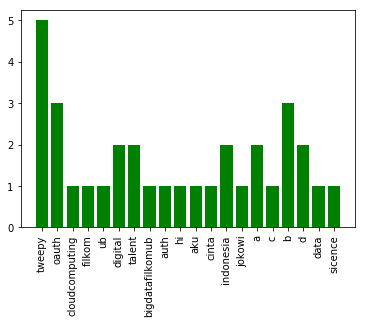

In [27]:
#plot frek_kata_n_other_dict
import matplotlib.pyplot as plt
plt.bar(list(frek_kata_n_other_dict.keys()), frek_kata_n_other_dict.values(), color='g')

plt.tick_params(axis='x', rotation=90)

plt.show()
plt.close()

<img src="img/thumbs-up.png"></img>